In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import LabelEncoder
import plotly.graph_objects as go
import plotly.figure_factory as ff
from scipy.cluster.hierarchy import linkage, dendrogram

In [37]:
customer_dataset = pd.read_csv('../Data/SMAI-Dataset-hc-dataset/new_customers.csv')
X_data = customer_dataset.iloc[:, [3, 4]].values
customer_dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [48]:
# Load the gene expression dataset
gene_dataset = pd.read_csv('../Data/SMAI-Dataset-gene-expression/gene.csv')
gene_dataset = gene_dataset.drop(columns=["ID_REF"])
gene_dataset.head()

,GSM613412,GSM613413,GSM613414,GSM613415,GSM613416,GSM613417,GSM613418,GSM613419,GSM613420,GSM613421,GSM613422,GSM613423
0,5192.23000,5974.6500,5393.02000,5158.65000,5244.96000,5143.31000,4621.77000,5173.65000,5811.77000,5465.11000,4972.57000,4528.70000
1,301.50300,307.6770,362.59600,372.77600,299.98000,308.91200,311.88300,331.53300,344.16100,365.17200,357.14600,372.43600
2,1850.11000,2037.5400,1891.18000,1752.97000,1718.80000,1762.98000,1630.54000,1905.87000,2141.35000,1891.99000,1652.14000,1593.69000
3,927.98300,1140.8200,936.43300,918.44000,930.31300,926.49600,793.72900,936.18400,1041.49000,942.37700,891.35900,826.81100
4,5.24974,5.0173,5.09585,3.76912,5.54982,5.27357,3.79682,4.66623,5.68881,5.25432,4.66148,3.93062


In [39]:
class HeirarchialClustering_testing():
    def __init__(self):
        self.linkage_matrix = None
        self.clusters = None

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1-x2)**2))

    def linkage_distance(self, X1, X2):
        len_x1 = X1.shape[0]
        len_x2 = X2.shape[0]
        distance = np.inf
        for i in range(len_x1):
            for j in range(len_x2):
                distance = min(distance, self.euclidean_distance(X1[i], X2[j]))
        return distance

    def compute_linkage_matrix(self, X, method='single'):
        self.linkage_matrix = linkage(X, method=method)
        return self.linkage_matrix

    def plot_dendrogram(self, title='Dendrogram'):
        plt.figure(figsize=(24, 4))
        dendrogram(self.linkage_matrix)
        plt.title(title)
        plt.xlabel('Data Points')
        plt.ylabel('Distance')
        plt.show()

In [40]:
class HierarchicalClustering:
    def __init__(self, data):
        self.data = data
        self.n_samples = self.data.shape[0]
        self.linkage_matrix = []
        self.clusters = {i: [i] for i in range(self.n_samples)}

    def _euclidean_distance(self, point1, point2):
        return np.sqrt(np.sum((point1 - point2) ** 2))

    def _complete_linkage(self, cluster1, cluster2):
        max_distance = -np.inf
        for i in cluster1:
            for j in cluster2:
                distance = self._euclidean_distance(self.data[i], self.data[j])
                if distance > max_distance:
                    max_distance = distance
        return max_distance

    def linkages(self):
        current_cluster_id = self.n_samples
        while len(self.clusters) > 1:
            keys = list(self.clusters.keys())
            min_distance = np.inf
            pair_to_merge = (keys[0], keys[1])

            for i in range(len(keys) - 1):
                for j in range(i + 1, len(keys)):
                    distance = self._complete_linkage(self.clusters[keys[i]], self.clusters[keys[j]])
                    if distance < min_distance:
                        min_distance = distance
                        pair_to_merge = (keys[i], keys[j])

            self.linkage_matrix.append([pair_to_merge[0], pair_to_merge[1], min_distance, len(self.clusters[pair_to_merge[0]]) + len(self.clusters[pair_to_merge[1]])])
            self.clusters[current_cluster_id] = self.clusters[pair_to_merge[0]] + self.clusters[pair_to_merge[1]]
            del self.clusters[pair_to_merge[0]]
            del self.clusters[pair_to_merge[1]]
            current_cluster_id += 1

        return self.linkage_matrix

    def compute_linkage_with_sklearn(self):
        self.linkage_matrix = linkage(self.data, method='complete')

    def plot_dendrogram(self, columns):
        # set title
        fig = ff.create_dendrogram(self.data, linkagefun=lambda x: self.linkage_matrix, color_threshold=1.5)
        fig.update_layout(width=800, height=500, title=columns)
        fig.show()

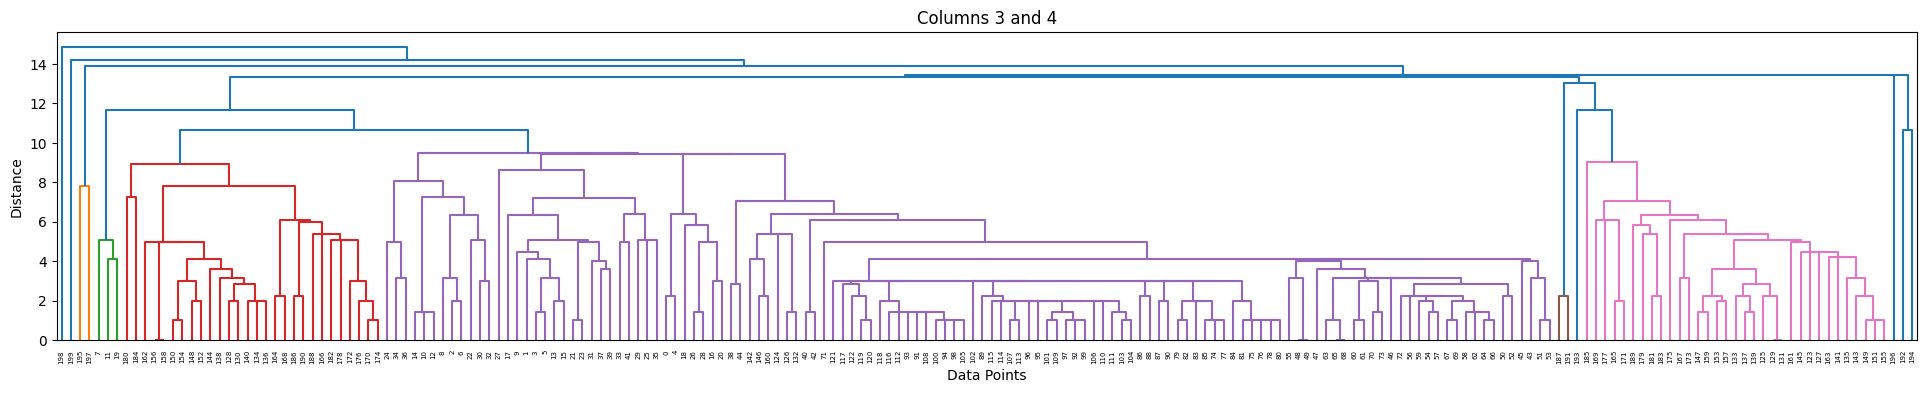

In [46]:
clus_model = HeirarchialClustering_testing()
linkage_matrix = clus_model.compute_linkage_matrix(X_data)
clus_model.plot_dendrogram(title="Columns 3 and 4")

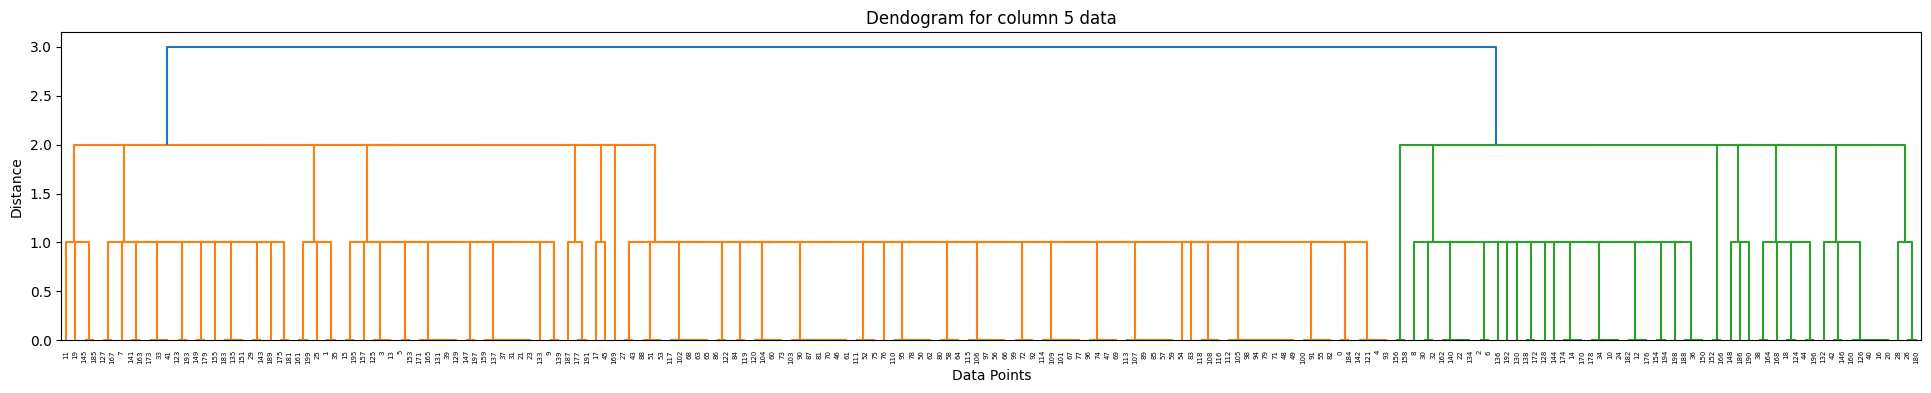

In [45]:
X_data_2 = customer_dataset.iloc[:, 4].values
X_data_2 = X_data_2[:, np.newaxis]

clus_model_2 = HeirarchialClustering_testing()
linkage_matrix_2 = clus_model_2.compute_linkage_matrix(X_data_2)
clus_model_2.plot_dendrogram(title = 'Dendogram for column 5 data')


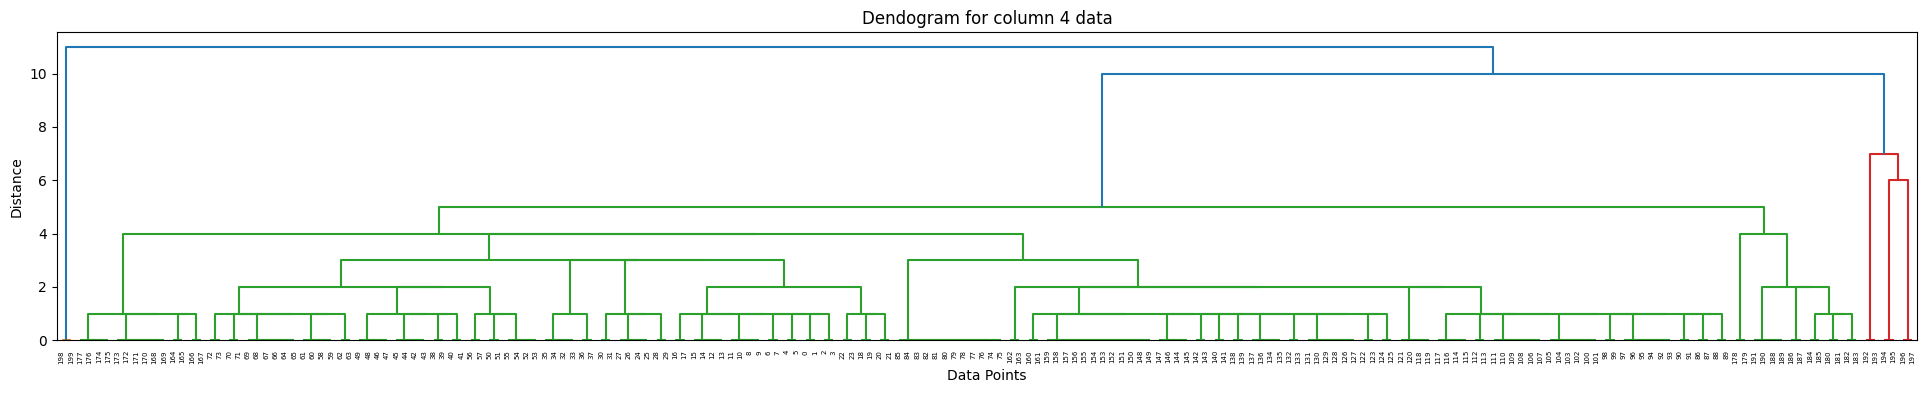

In [47]:
X_data_3 = customer_dataset.iloc[:, 3].values
X_data_3 = X_data_3[:, np.newaxis]

clus_model_3 = HeirarchialClustering_testing()
linkage_matrix_3 = clus_model_3.compute_linkage_matrix(X_data_3)
clus_model_3.plot_dendrogram(title = 'Dendogram for column 4 data')

## Gene Dataset

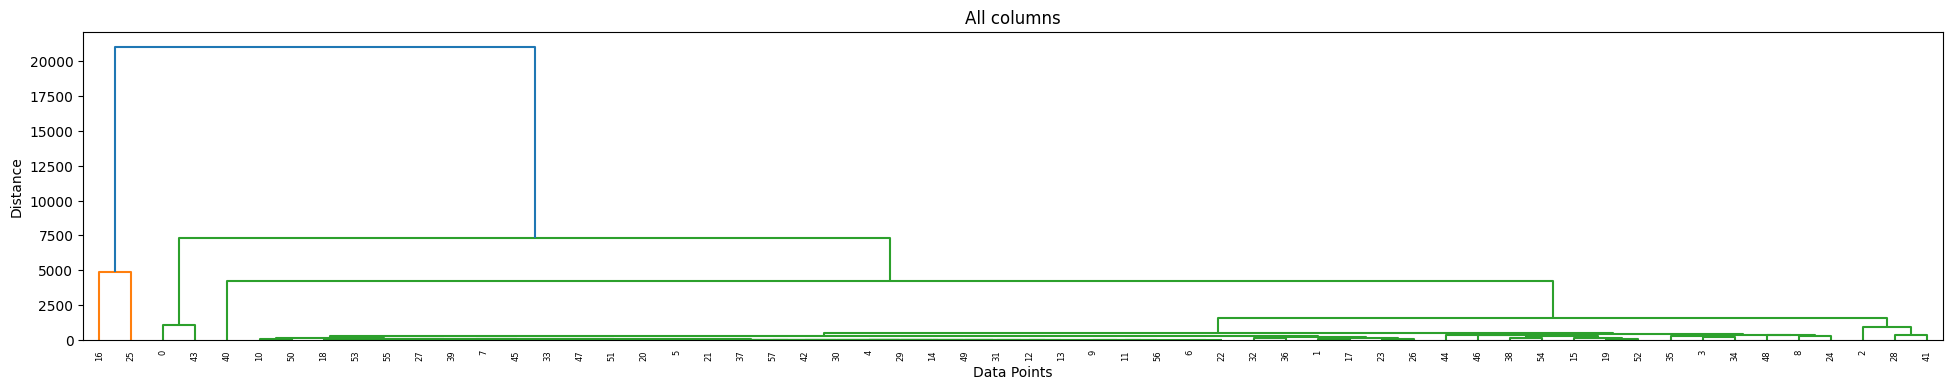

In [49]:
X_genedataset = gene_dataset.iloc[:, 1:].values
model = HeirarchialClustering_testing()
linkage_matrix = model.compute_linkage_matrix(X_genedataset)
model.plot_dendrogram(title="All columns")

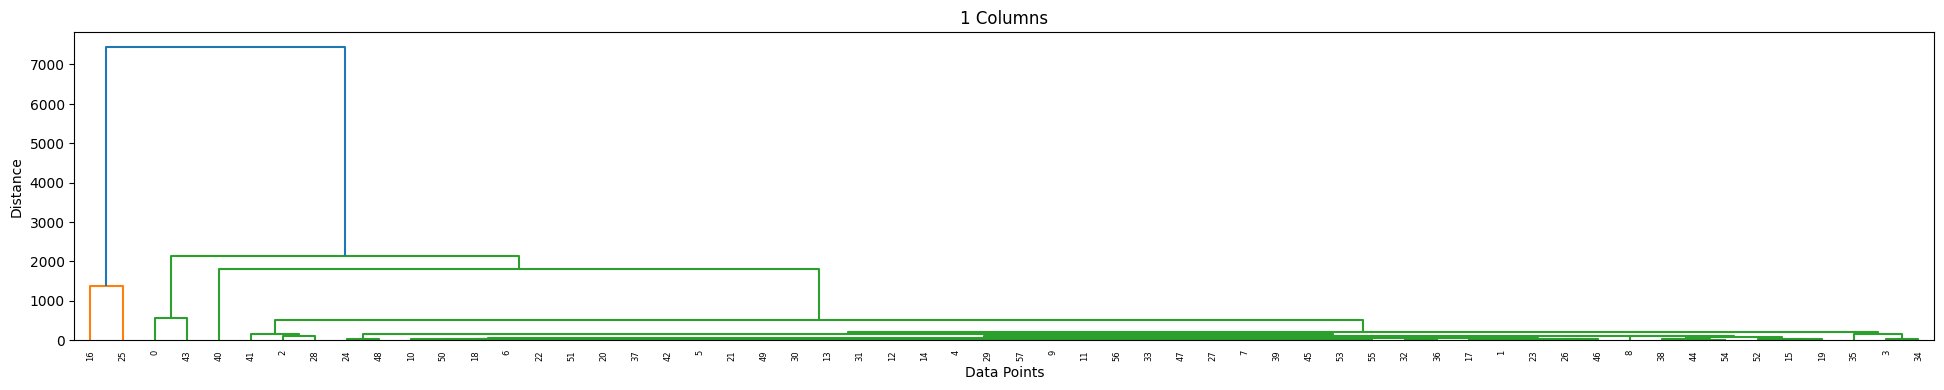

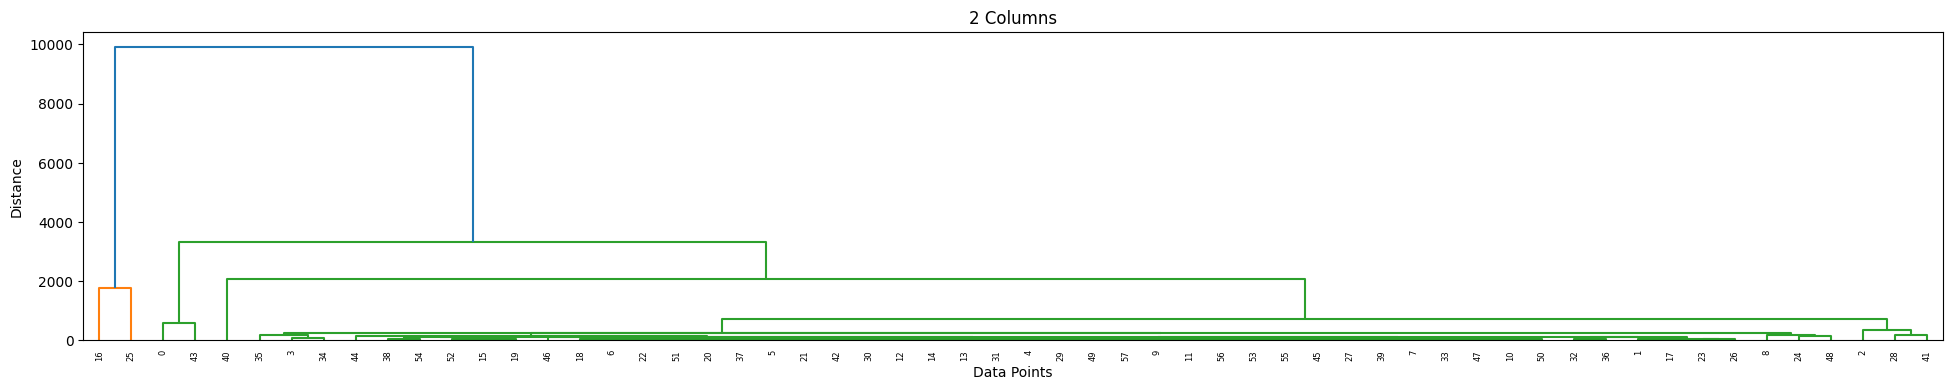

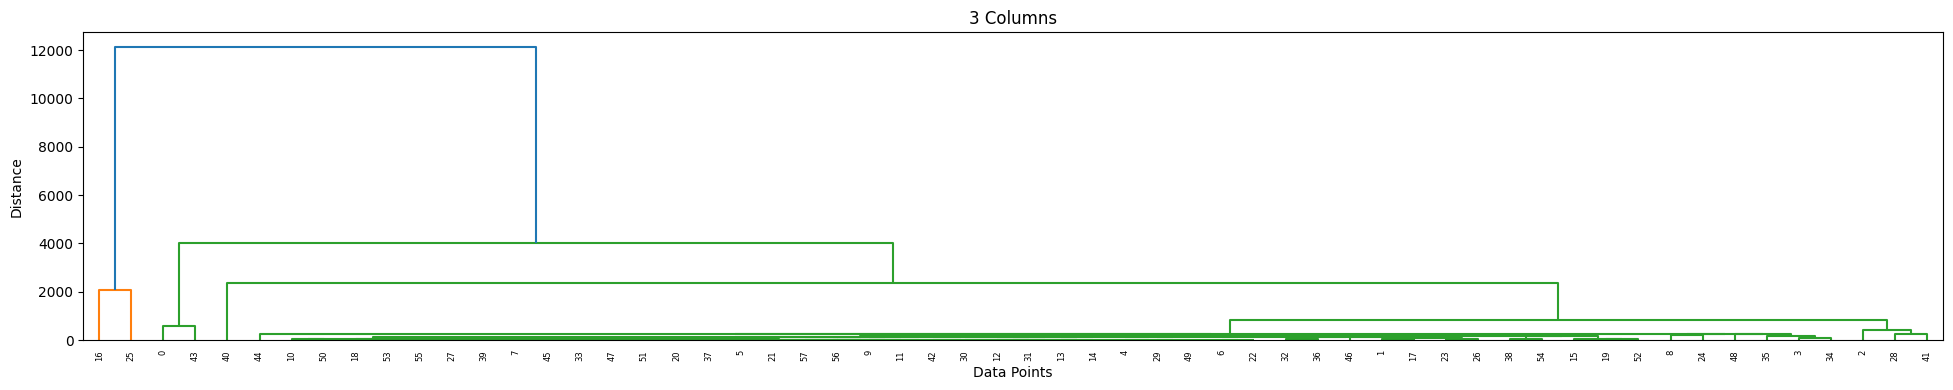

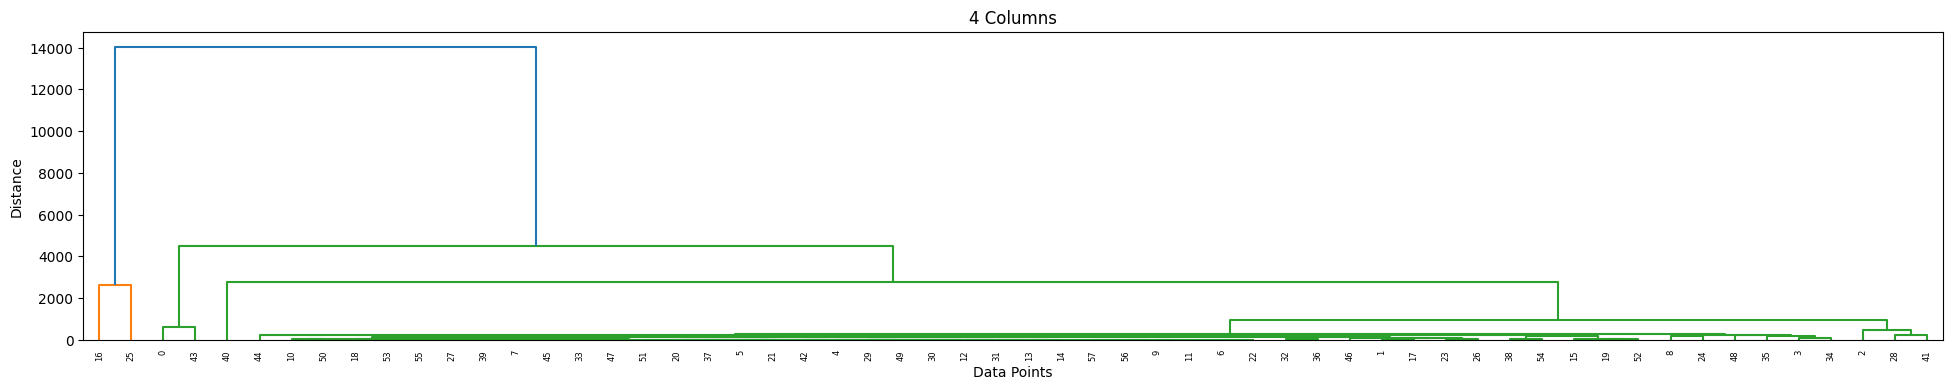

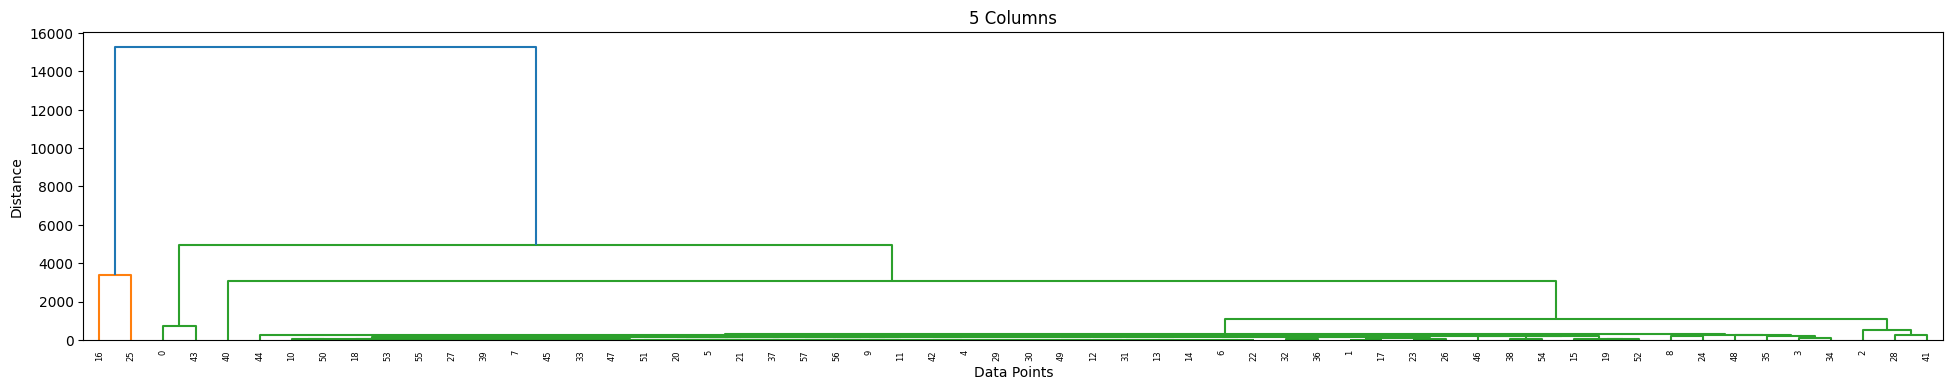

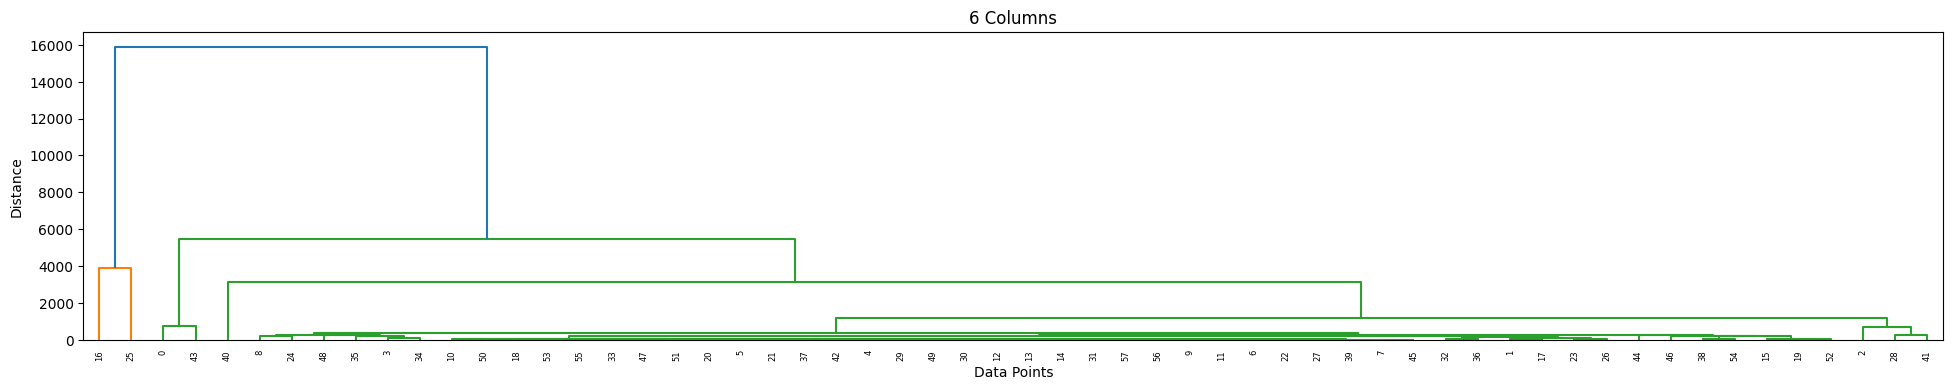

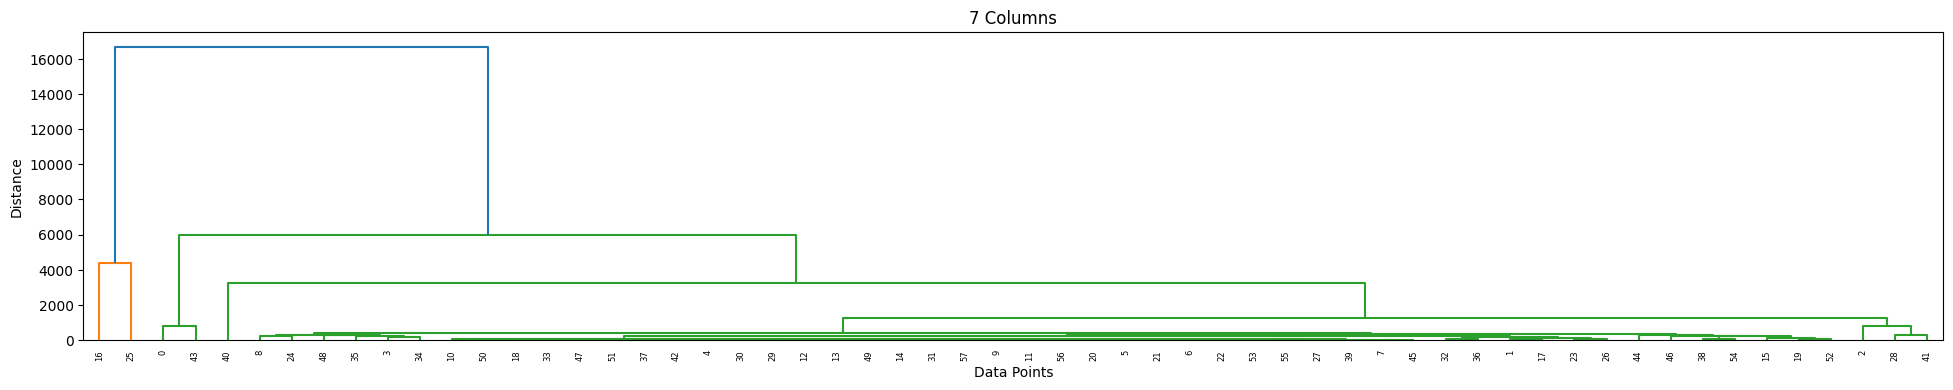

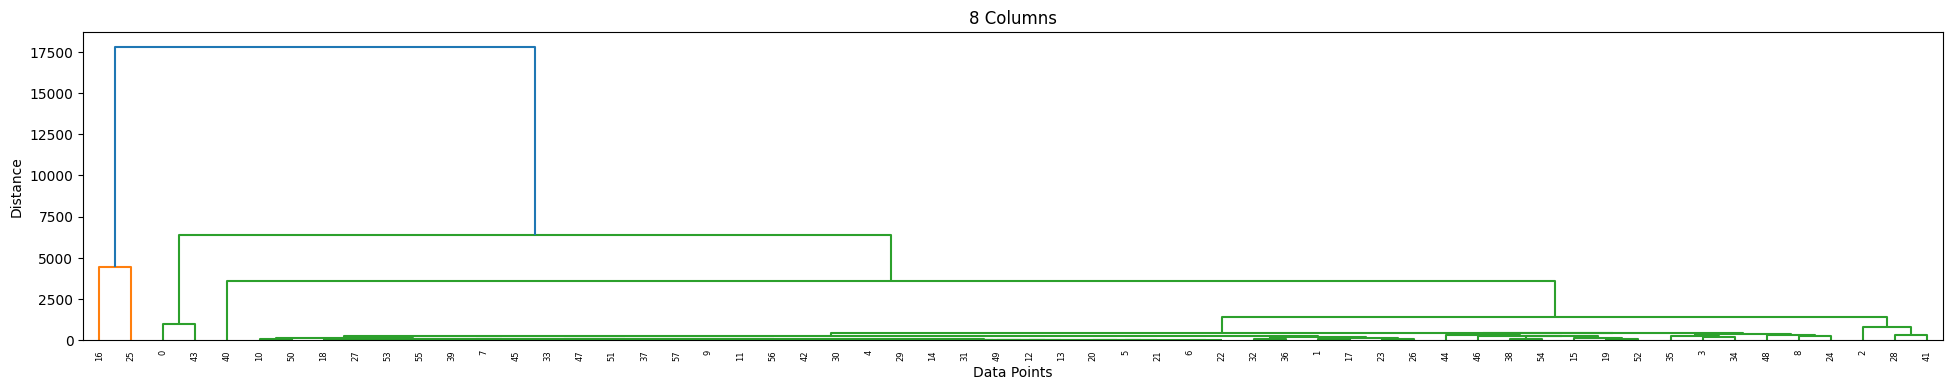

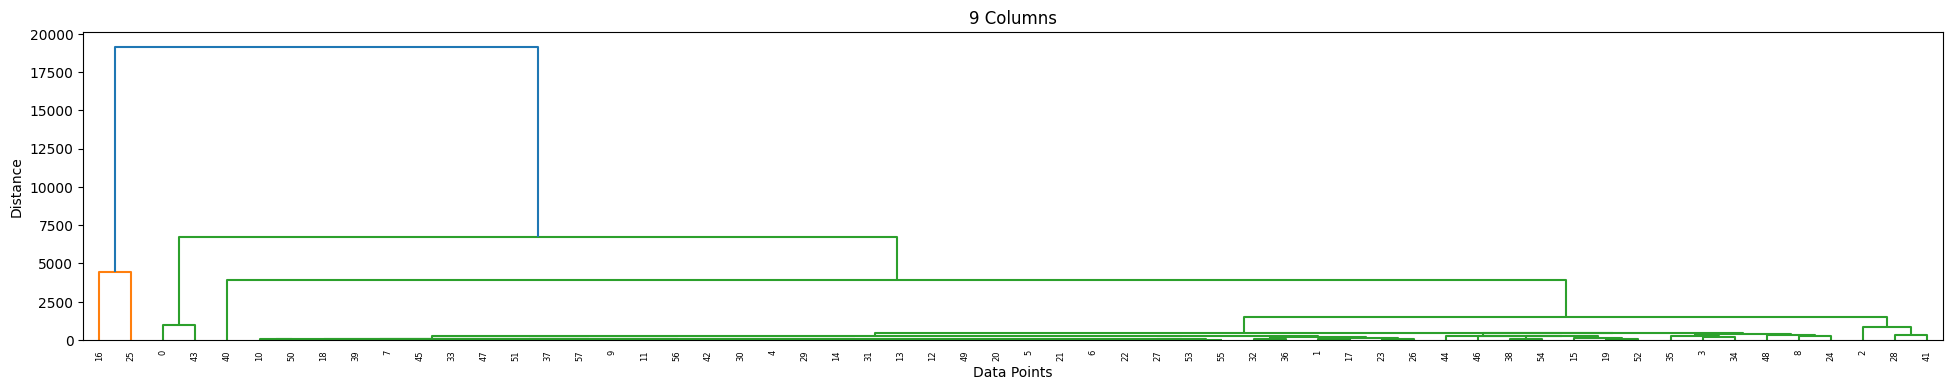

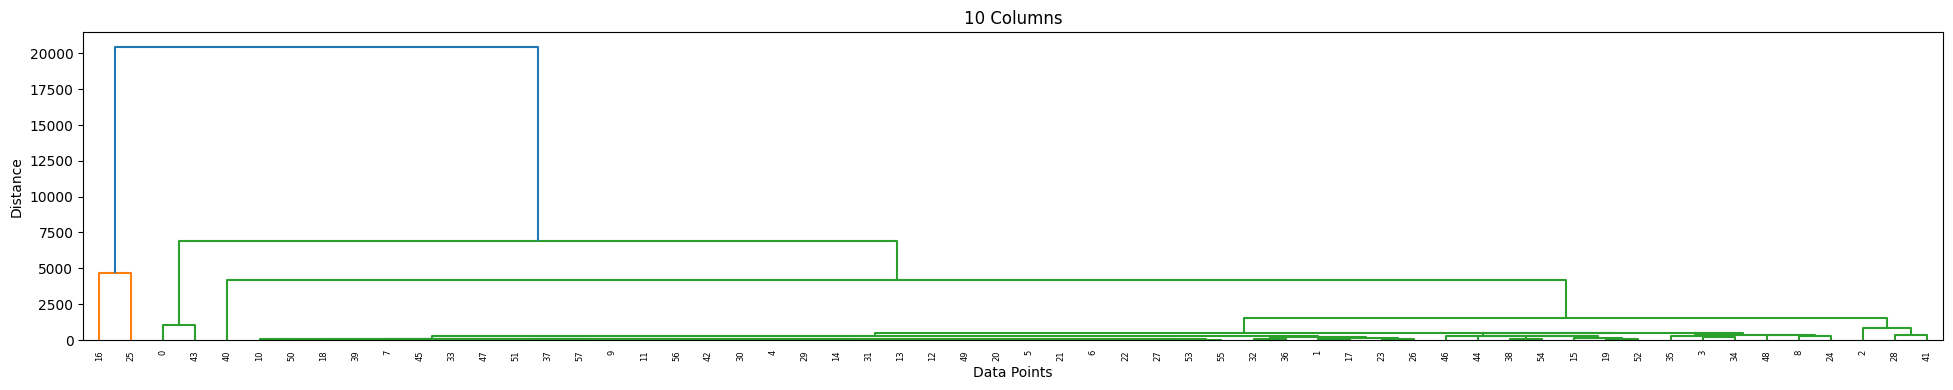

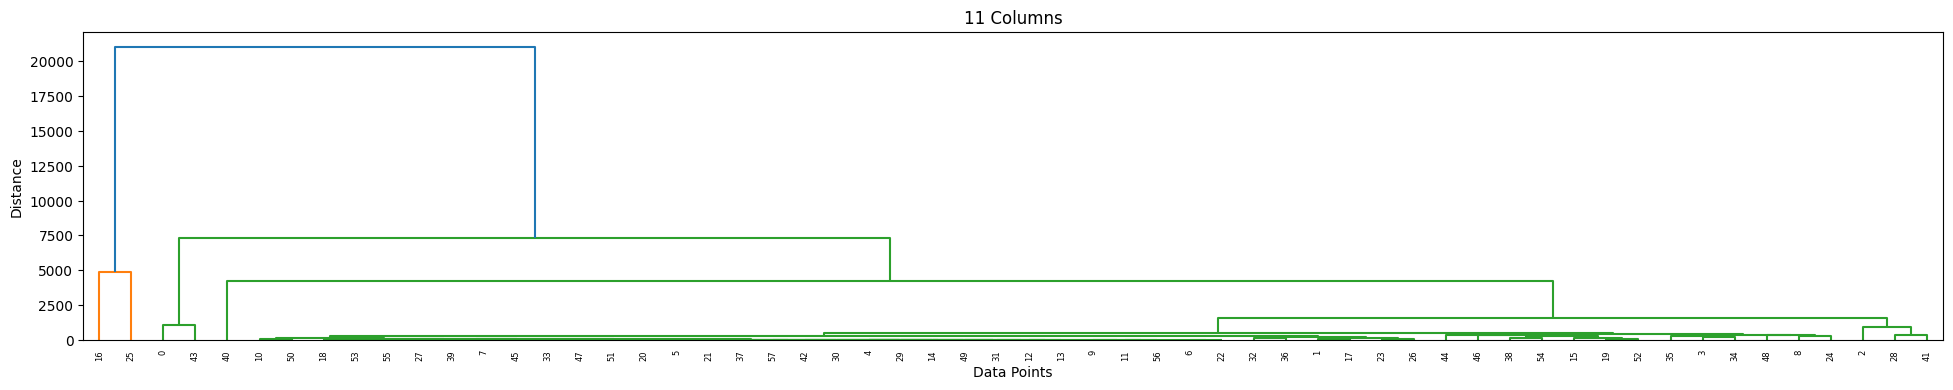

In [53]:
max_cols = np.arange(1, X_genedataset.shape[1]+1)

for col in max_cols:
    X_genedataset = gene_dataset.iloc[:, 1:col+1].values
    gene_model = HeirarchialClustering_testing()
    linkage_matrix = gene_model.compute_linkage_matrix(X_genedataset)
    gene_model.plot_dendrogram(title = f'{col} Columns')